In [44]:
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

In [45]:
# Function to calculate mean and 95% CI
def mean_confidence_interval(data, confidence=0.95):
    a = np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [46]:
# Vascular Fidelity
dsa_scores = [3] * (9+8+14) + [2] * (12+12+7) + [1] * (1+2+1)
print(len(dsa_scores), np.mean(dsa_scores), np.std(dsa_scores))
print(dsa_scores)

reg_scores = [5] * (2+0+0) + [4] * (15+20+10) + [3] * (11+8+18)
print(len(reg_scores), np.mean(reg_scores), np.std(reg_scores))
print(reg_scores)

66 2.409090909090909 0.6024513743051831
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1]
84 3.5833333333333335 0.5391424702011549
[5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [47]:
print(stats.t.interval(0.95, len(dsa_scores)-1, loc=np.mean(dsa_scores), scale=stats.sem(dsa_scores)))

mean_confidence_interval(dsa_scores)

(2.259854986007689, 2.5583268321741293)


(2.409090909090909, 2.259854986007689, 2.5583268321741293)

In [48]:
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(dsa_scores, reg_scores, alternative='two-sided')

print("Mann-Whitney U Statistic:", stat)
print("P-value:", p)

Mann-Whitney U Statistic: 573.5
P-value: 4.805074715523407e-19


In [49]:
# # Calculate means and CIs
# mean1, ci_low1, ci_high1 = mean_confidence_interval(dsa_scores)
# mean2, ci_low2, ci_high2 = mean_confidence_interval(reg_scores)

# # Plotting
# plt.figure(figsize=(3.5, 4.5))
# sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2")
# plt.errorbar(x=[0, 1], y=[mean1, mean2],
#              yerr=[[mean1-ci_low1, mean2-ci_low2], [ci_high1-mean1, ci_high2-mean2]],
#              fmt='o', color='red', label='Mean ± 95% CI')

# # Customizing plot
# plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
# plt.title('Vascular Fidelity', fontsize=14)
# plt.ylabel('Likert Scores', fontsize=12)
# plt.legend()

# plt.show()

In [50]:
# # Calculate means and standard errors
# mean1 = np.mean(dsa_scores)
# mean2 = np.mean(reg_scores)
# sem1 = stats.sem(dsa_scores)
# sem2 = stats.sem(reg_scores)

# # Calculate 95% confidence intervals
# ci1 = 1.96 * sem1
# ci2 = 1.96 * sem2

# # Plotting
# fig, ax = plt.subplots()
# bars = ax.bar(['Group 1', 'Group 2'], [mean1, mean2], yerr=[ci1, ci2], capsize=10, color=['blue', 'green'])
# ax.set_ylabel('Mean Scores')
# ax.set_title('Mean Scores of Group 1 and Group 2 with 95% CI')

# # Adding the means as text on the bars for better visualization
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# plt.show()

In [51]:

# # Data
# group1 = [3]*31 + [2]*49 + [1]*4
# group2 = [5]*1 + [4]*48 + [3]*21

# # Combine the groups into a single list and create a corresponding labels list
# data = group1 + group2
# labels = ['Group 1']*len(group1) + ['Group 2']*len(group2)

# # Create a DataFrame for easier plotting with seaborn
# df = pd.DataFrame({'Value': data, 'Group': labels})

# # Create the box plot with individual data points
# plt.figure(figsize=(10, 6))  # Set the figure size
# sns.set_style("whitegrid")
# sns.boxplot(x='Group', y='Value', data=df, showmeans=True,
#             meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})  # Show means as a red circle

# # # Add individual points with a small jitter on the x-axis
# # sns.stripplot(x='Group', y='Value', data=df, color='blue', jitter=0.1, size=5, alpha=0.5)

# # # Set plot titles and labels
# # plt.title('Comparison of Two Groups')
# # plt.xlabel('Group')
# # plt.ylabel('Value')

# # Show the plot
# plt.show()



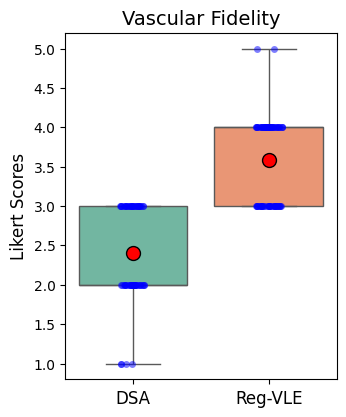

In [52]:
plt.figure(figsize=(3.5, 4.5))
box_plot = sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

sns.stripplot(data=[dsa_scores, reg_scores], color='blue', jitter=0.1, size=5, alpha=0.5)

# Set plot titles and labels
plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
plt.title('Vascular Fidelity', fontsize=14)
plt.ylabel('Likert Scores', fontsize=12)
plt.grid(False)

plt.show()

In [53]:
# Subtraction Artifacts
dsa_scores = [3] * (2+2+3) + [2] * (19+18+17) + [1] * (1+2+2)
print(len(dsa_scores), np.mean(dsa_scores), np.std(dsa_scores))
print(dsa_scores)

reg_scores = [5] * (2+0+0) + [4] * (24+25+25) + [3] * (2+3+3)
print(len(reg_scores), np.mean(reg_scores), np.std(reg_scores))
print(reg_scores)

66 2.0303030303030303 0.42532329841267275
[3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
84 3.9285714285714284 0.3375582590180434
[5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3]


In [54]:
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(dsa_scores, reg_scores, alternative='two-sided')

print("Mann-Whitney U Statistic:", stat)
print("P-value:", p)

Mann-Whitney U Statistic: 28.0
P-value: 4.923711807892862e-30


In [55]:
# # Calculate means and CIs
# mean1, ci_low1, ci_high1 = mean_confidence_interval(dsa_scores)
# mean2, ci_low2, ci_high2 = mean_confidence_interval(reg_scores)

# # Plotting
# plt.figure(figsize=(3.5, 4.5))
# sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2")
# plt.errorbar(x=[0, 1], y=[mean1, mean2],
#              yerr=[[mean1-ci_low1, mean2-ci_low2], [ci_high1-mean1, ci_high2-mean2]],
#              fmt='o', color='red', label='Mean ± 95% CI')

# # Customizing plot
# plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
# plt.title('Subtraction Artifacts', fontsize=14)
# plt.ylabel('Likert Scores', fontsize=12)
# plt.legend()

# plt.show()

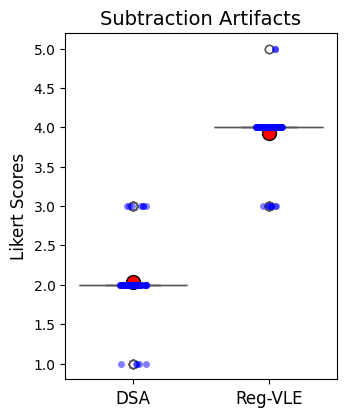

In [56]:
plt.figure(figsize=(3.5, 4.5))
box_plot = sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

sns.stripplot(data=[dsa_scores, reg_scores], color='blue', jitter=0.1, size=5, alpha=0.5)

# Set plot titles and labels
plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
plt.title('Subtraction Artifacts', fontsize=14)
plt.ylabel('Likert Scores', fontsize=12)
plt.grid(False)

plt.show()

In [57]:
# Overall Quality
dsa_scores = [3] * (2+7+3) + [2] * (19+13+17) + [1] * (1+2+2)
print(len(dsa_scores), np.mean(dsa_scores), np.std(dsa_scores))
print(dsa_scores)

reg_scores = [5] * (2+0+0) + [4] * (23+23+25) + [3] * (3+5+3)
print(len(reg_scores), np.mean(reg_scores), np.std(reg_scores))
print(reg_scores)

66 2.106060606060606 0.4963133137624
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
84 3.892857142857143 0.3785265022758249
[5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [58]:
# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(dsa_scores, reg_scores, alternative='two-sided')

print("Mann-Whitney U Statistic:", stat)
print("P-value:", p)

Mann-Whitney U Statistic: 66.0
P-value: 1.664640352811248e-28


In [59]:
# # Calculate means and CIs
# mean1, ci_low1, ci_high1 = mean_confidence_interval(dsa_scores)
# mean2, ci_low2, ci_high2 = mean_confidence_interval(reg_scores)

# # Plotting
# plt.figure(figsize=(3.5, 4.5))
# sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2")
# plt.errorbar(x=[0, 1], y=[mean1, mean2],
#              yerr=[[mean1-ci_low1, mean2-ci_low2], [ci_high1-mean1, ci_high2-mean2]],
#              fmt='o', color='red', label='Mean ± 95% CI')

# # Customizing plot
# plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
# plt.title('Overall Quality', fontsize=14)
# plt.ylabel('Likert Scores', fontsize=12)
# plt.legend()

# plt.show()

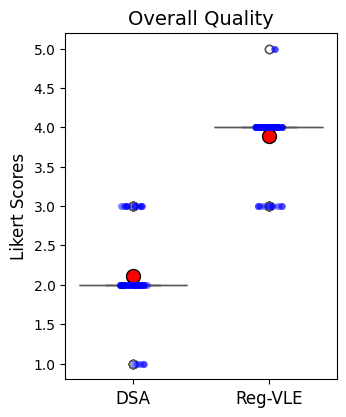

In [60]:
plt.figure(figsize=(3.5, 4.5))
box_plot = sns.boxplot(data=[dsa_scores, reg_scores], palette="Set2", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

sns.stripplot(data=[dsa_scores, reg_scores], color='blue', jitter=0.1, size=5, alpha=0.5)

# Set plot titles and labels
plt.xticks(ticks=[0, 1], labels=['DSA', 'Reg-VLE'], fontsize=12)
plt.title('Overall Quality', fontsize=14)
plt.ylabel('Likert Scores', fontsize=12)
plt.grid(False)

plt.show()